In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from collections import Counter
from files.sb_utils import save_file
warnings.simplefilter(action="ignore", category=UserWarning)

In [2]:
#delete path for privacy reasons
#load in anime dataset
anime = pd.read_csv(r'C:\Users\sydne\Desktop\Springboard\Cap2\Data\anime_data.csv')


Load in Popular and least_popular_anime and manga datasets

In [3]:
popular_anime = pd.read_csv('..\Data\popular_anime_1.csv')
#popular_anime = pd.read_csv('..\Data\popular_anime_new.csv')

In [4]:

#popular_anime['start_year'] = popular_anime['start_year'].fillna(0.0).astype('int64')

For Now,Focus on the Anime Datasets: popular_anime and least_anime. 

In [5]:
anime.dtypes

anime_id           int64
title             object
type              object
score            float64
scored_by          int64
status            object
episodes         float64
source            object
rating            object
sfw                 bool
created_at        object
start_year       float64
start_season      object
real_end_date     object
genres            object
themes            object
demographics      object
studios           object
producers         object
licensors         object
dtype: object

Use .describe() to see the summary statistics 

In [6]:
anime.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,14464.0,21060.530420,16841.673836,1.00,4484.75,17988.00,36121.25,56111.0
score,14464.0,6.470337,0.901820,1.85,5.87,6.48,7.13,9.1
scored_by,14464.0,32967.543072,122839.839085,100.00,490.75,2213.00,13369.75,2685033.0
episodes,14374.0,12.361208,50.306492,1.00,1.00,2.00,12.00,3057.0
start_year,13729.0,2007.824532,12.991688,1917.00,2002.00,2011.00,2017.00,2023.0


In [7]:
anime.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anime_id,14464.0,NaN,NaN,NaN,21060.53042,16841.673836,1.0,4484.75,17988.0,36121.25,56111.0
title,14464,14464,Fullmetal Alchemist: Brotherhood,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,14463,5,tv,4561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,14464.0,NaN,NaN,NaN,6.470337,0.90182,1.85,5.87,6.48,7.13,9.1
scored_by,14464.0,NaN,NaN,NaN,32967.543072,122839.839085,100.0,490.75,2213.0,13369.75,2685033.0
status,14464,2,finished_airing,14303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,14374.0,NaN,NaN,NaN,12.361208,50.306492,1.0,1.0,2.0,12.0,3057.0
source,12877,16,manga,4176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,14365,6,pg_13,6633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sfw,14464,2,True,12946,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot variables of each dataset

array([[<Axes: title={'center': 'anime_id'}>,
        <Axes: title={'center': 'score'}>],
       [<Axes: title={'center': 'scored_by'}>,
        <Axes: title={'center': 'episodes'}>],
       [<Axes: title={'center': 'start_year'}>, <Axes: >]], dtype=object)

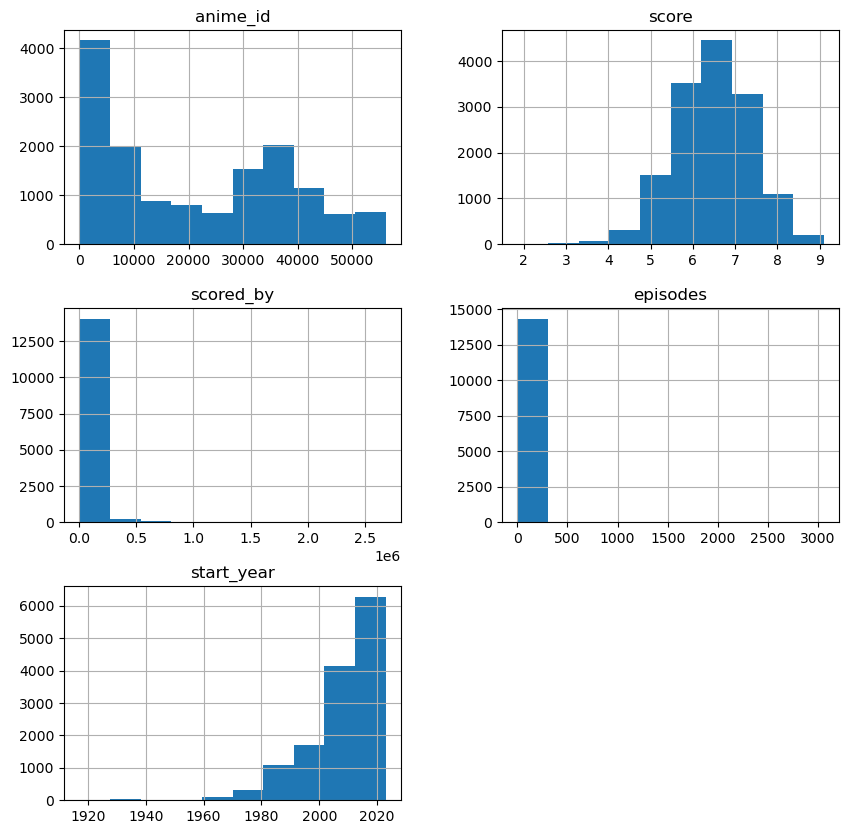

In [8]:
anime.hist(figsize = (10,10))

## Which Year has the most anime?

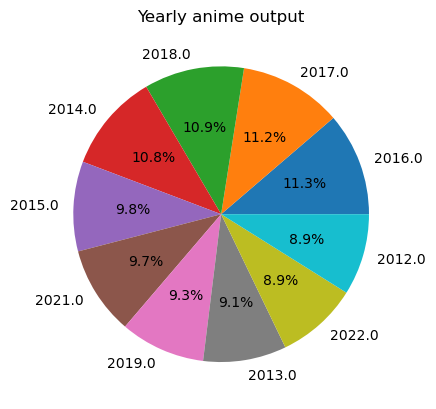

In [9]:
years = anime['start_year'].value_counts(ascending=False)
years_count = pd.DataFrame({'id' : years.index, 'year_count': years.values})
years_great = years_count.head(10)
#years_great.loc[len(years_great.index)] = ['other', years_count['year_count'].drop(years_great.index).sum()] 
plt.pie(years_great['year_count'], labels = years_great['id'], autopct= '%1.1f%%')
plt.title("Yearly anime output")
plt.show()

We take count the amount of times a year has appeared and then took the top 10 values(years) and we see that from 2012 to 2022, excluding 2020, produced the most anime. 2016 producing at most around 2% more than the rest

## How much has the score changed over the years?

c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


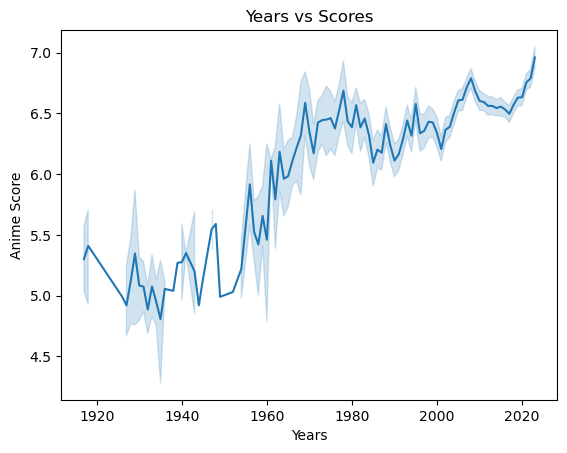

In [10]:
sns.lineplot(data = anime, x = 'start_year', y = 'score')
plt.xlabel('Years')
plt.ylabel('Anime Score')
plt.title('Years vs Scores')
plt.show()


For the most part it appears that the anime scores have steadily increased. 

## Has Anime viewership increased? to view this let's look at the years vs scored_by, this will give us the closest estimation  

c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


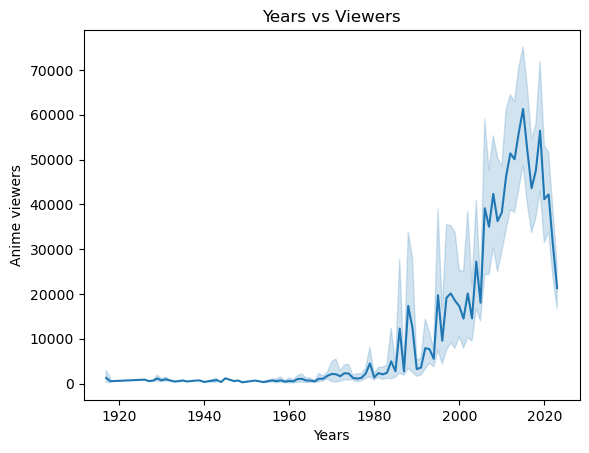

In [11]:
sns.lineplot(data = anime, x = 'start_year', y = 'scored_by')
plt.xlabel('Years')
plt.ylabel('Anime viewers')
plt.title('Years vs Viewers')
plt.show()

#### Peak viewership looks like it might be around 2015

## Which season has the most anime?

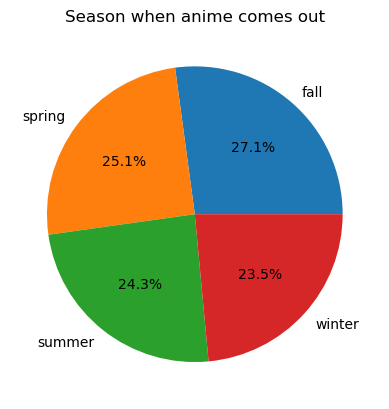

In [12]:
seasons =anime['start_season'].value_counts()
plt.pie(seasons.values, labels=seasons.index, autopct='%1.1f%%')
plt.title("Season when anime comes out")
plt.show()

<Axes: xlabel='count', ylabel='start_season'>

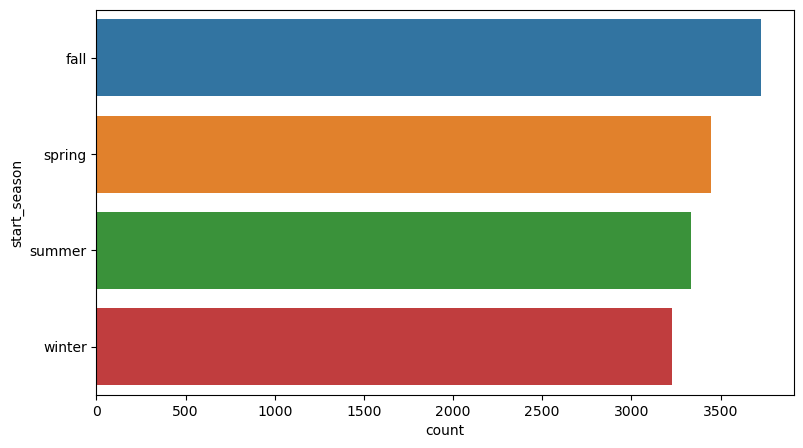

In [13]:
season = anime['start_season'].value_counts().index
count_season = anime['start_season'].value_counts()
count_season
plt.figure(figsize= (9,5))
sns.barplot(y = season, x = count_season)

#### for the most part, the seasons are all pretty close in percentages, which means that the number of animes premiering in each season is very close, however spring and fall do have a bit more anime compared to winter and summer. 

## What is the most common type of Anime (tv show, movie, ONA, OVA)

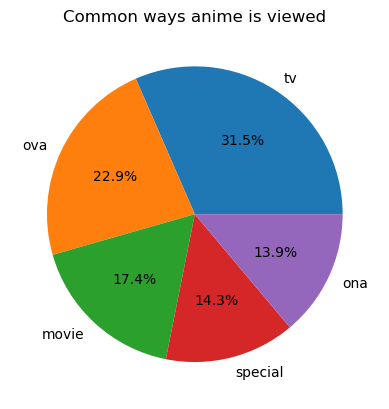

In [14]:
types =anime['type'].value_counts()
plt.pie(types.values, labels=types.index, autopct='%1.1f%%')
plt.title("Common ways anime is viewed")
plt.show()

In [15]:
types

type
tv         4561
ova        3312
movie      2520
special    2062
ona        2008
Name: count, dtype: int64

### How much anime is within each type? 

<Axes: xlabel='count', ylabel='type'>

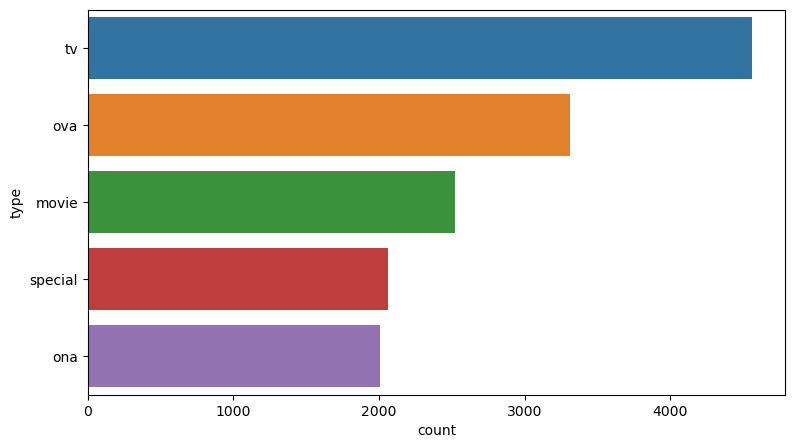

In [16]:
type = anime['type'].value_counts().index
count_type = anime['type'].value_counts()
plt.figure(figsize= (9,5))
sns.barplot(y = type, x = count_type)

### Type v Score, average score per type

In [17]:
anime.groupby(['type']).agg({'score' : 'mean'}).sort_values('score', ascending= False)

,score
type,
tv,6.866374
special,6.400936
movie,6.389381
ova,6.251796
ona,6.104223


In [82]:
anime.groupby(['type']).agg({'score' : 'median'}).sort_values('score', ascending= False)

,score
type,
tv,6.87
movie,6.43
special,6.40
ova,6.25
ona,6.06


<Axes: xlabel='type', ylabel='score'>

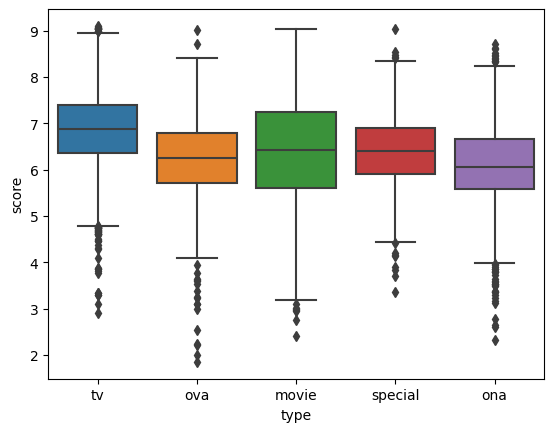

In [18]:
sns.boxplot(y = 'score', x = 'type',data= anime, order=anime['type'].value_counts().index )

# Does number of episodes have an impact on score?

In [19]:
anime['episodes'].corr(anime['score'], method = 'spearman')

0.2903462451430247

<Axes: xlabel='episodes', ylabel='score'>

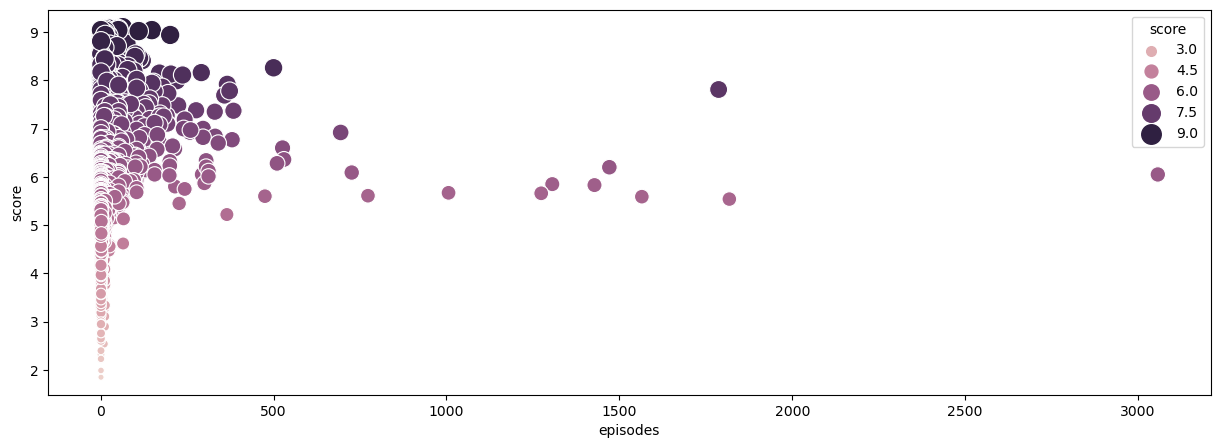

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = anime,x = 'episodes', y = 'score', hue = 'score', size = 'score', sizes=(20,200))

To begin, most anime has roughly the same amount of episodes, and those that do have over 500 episodes tend to still be in the 6 to 7 range of scores. 

##  Check Anime Sources

### Most common sources

<Axes: xlabel='count', ylabel='source'>

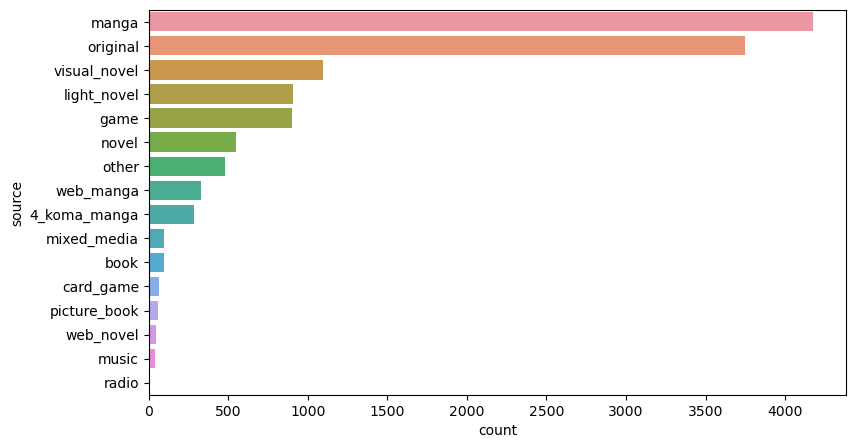

In [21]:
source = anime['source'].value_counts().index
count_source = anime['source'].value_counts()
plt.figure(figsize= (9,5))
sns.barplot(y = source, x = count_source)

In [22]:
anime['source'].value_counts()

source
manga           4176
original        3750
visual_novel    1094
light_novel      905
game             901
novel            547
other            482
web_manga        328
4_koma_manga     284
mixed_media       98
book              95
card_game         65
picture_book      59
web_novel         45
music             38
radio             10
Name: count, dtype: int64

The most common anime source is manga. 

### Compare source to score 

In [23]:
anime.groupby(['source']).agg({'score' : 'median'}).sort_values('score', ascending= False)

,score
source,
web_novel,7.040
light_novel,7.010
manga,6.880
web_manga,6.830
novel,6.740
4_koma_manga,6.640
mixed_media,6.625
book,6.550
card_game,6.430


In [83]:
anime.groupby(['source']).agg({'score' : 'mean'}).sort_values('score', ascending= False)

,score
source,
web_novel,7.056222
light_novel,6.963801
manga,6.855694
web_manga,6.779329
novel,6.753912
4_koma_manga,6.672465
mixed_media,6.639592
book,6.468211
card_game,6.353692


Based on the scores, it appears that people tend to score anime based on web novels the highest with light novels in a close second. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'manga'),
  Text(1, 0, 'original'),
  Text(2, 0, 'visual_novel'),
  Text(3, 0, 'light_novel'),
  Text(4, 0, 'game'),
  Text(5, 0, 'novel'),
  Text(6, 0, 'other'),
  Text(7, 0, 'web_manga'),
  Text(8, 0, '4_koma_manga'),
  Text(9, 0, 'mixed_media'),
  Text(10, 0, 'book'),
  Text(11, 0, 'card_game'),
  Text(12, 0, 'picture_book'),
  Text(13, 0, 'web_novel'),
  Text(14, 0, 'music'),
  Text(15, 0, 'radio')])

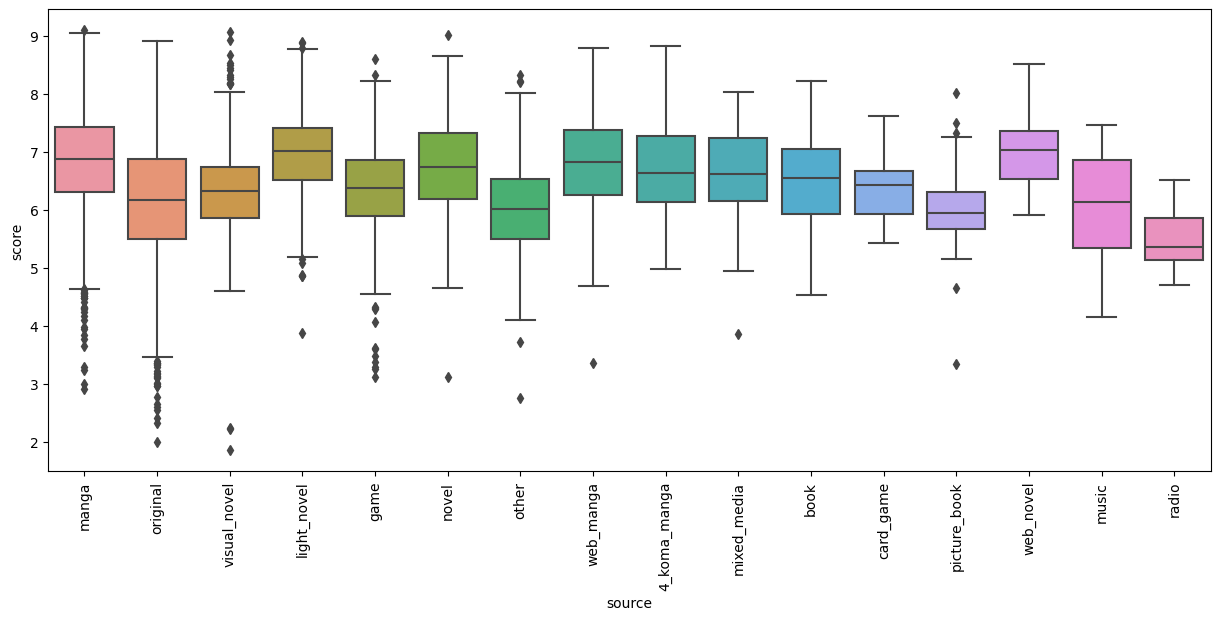

In [24]:
plt.figure(figsize=(15, 6))
sns.boxplot(y = 'score', x = 'source',data= anime, order=anime['source'].value_counts().index)
plt.xticks(rotation = 90)

Web novel based anime seems to score the best based on the median score, Original and manga based anime do have a more diverse spread of scores, though that is to be expected as, they have the most amount of anime 

# Rating to Score

### Most common rating among anime

<Axes: xlabel='count', ylabel='rating'>

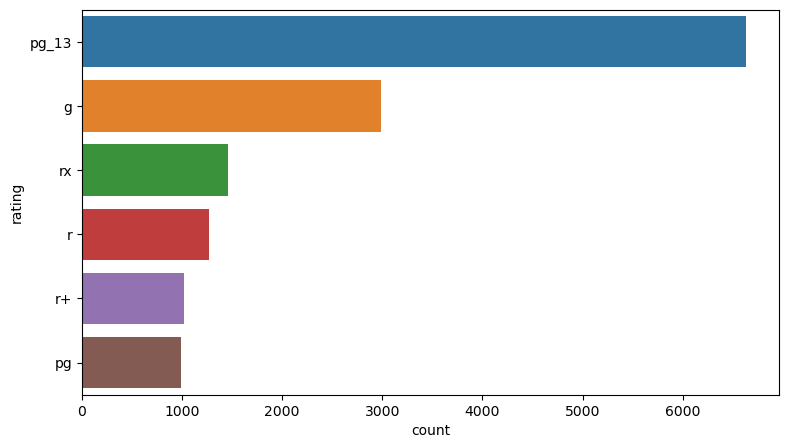

In [25]:
ratings = anime['rating'].value_counts().index
rating_source = anime['rating'].value_counts()
plt.figure(figsize= (9,5))
sns.barplot(y = ratings, x = rating_source)

In [26]:
anime['rating'].value_counts()

rating
pg_13    6633
g        2983
rx       1461
r        1275
r+       1020
pg        993
Name: count, dtype: int64

### Comparing Rating to score

In [27]:
anime.groupby(['rating']).agg({'score' : 'median'}).sort_values('score', ascending= False)

,score
rating,
r,7.060
pg_13,6.750
pg,6.380
r+,6.355
rx,6.170
g,5.930


In [84]:
anime.groupby(['rating']).agg({'score' : 'mean'}).sort_values('score', ascending= False)

,score
rating,
r,6.951710
pg_13,6.728907
pg,6.375378
r+,6.266941
rx,6.107967
g,5.980808


<Axes: xlabel='rating', ylabel='score'>

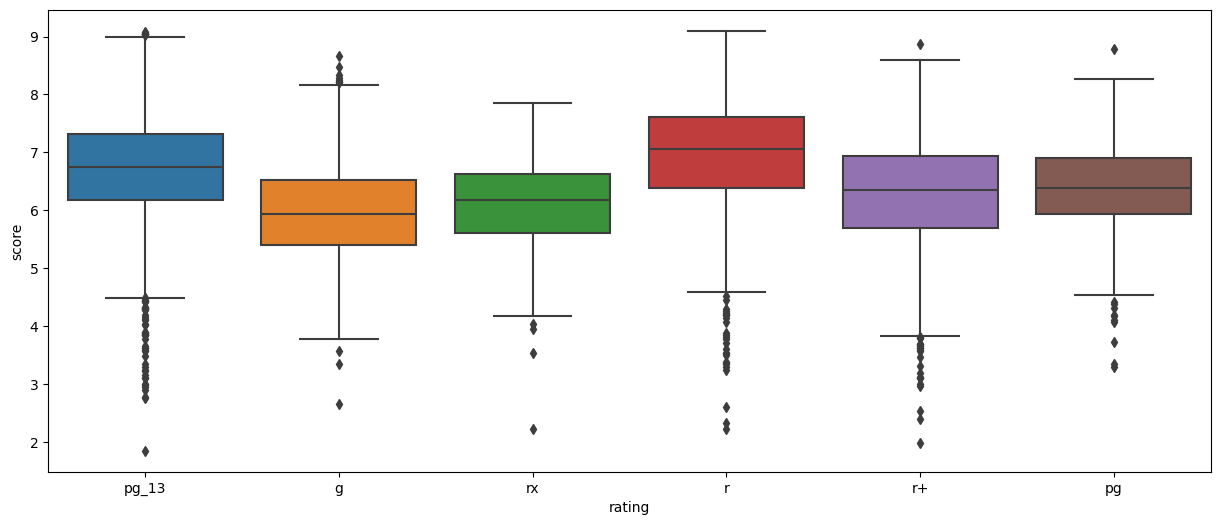

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(y = 'score', x = 'rating',data= anime, order=anime['rating'].value_counts().index)


Animes with an 'R' rating is most valued among watchers. 

# Demographic Feature

## what is the most common demographic for anime?

In [29]:
anime['demographics'].value_counts()

demographics
Shounen          1696
Kids              937
Seinen            859
Shoujo            579
Josei             112
Kids, Shounen      50
Kids, Shoujo       23
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='demographics'>

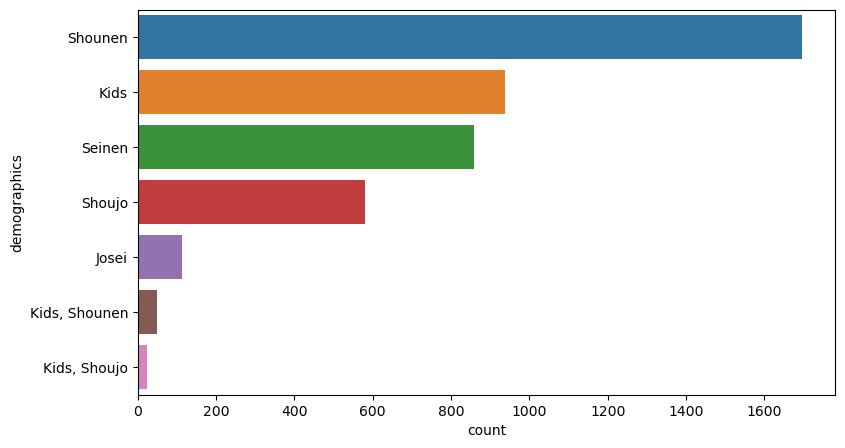

In [30]:
demos = anime['demographics'].value_counts().index
demo_count = anime['demographics'].value_counts()
plt.figure(figsize= (9,5))
sns.barplot(y = demos, x = demo_count)


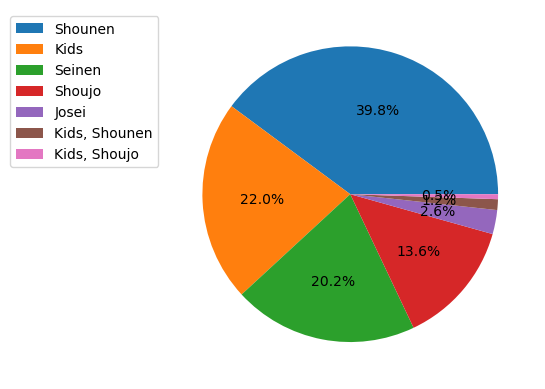

In [31]:
plt.pie(demo_count, autopct= '%1.1f%%')
plt.legend(labels = demos,bbox_to_anchor=(0,1))

Shounen anime is the most common demographic for anime, taking up roughly 39.8% of the demographic from the anime dataset

## Compare demographic to score. Which Demographic has the highest score(which demogrpahic do the watchers emjoy the most)? 

In [32]:
anime.groupby(['demographics']).agg({'score' : 'median'}).sort_values('score', ascending= False)

,score
demographics,
Shounen,7.180
"Kids, Shounen",7.045
Seinen,7.020
Josei,6.895
Shoujo,6.860
"Kids, Shoujo",6.600
Kids,6.100


In [85]:
anime.groupby(['demographics']).agg({'score' : 'mean'}).sort_values('score', ascending= False)

,score
demographics,
Shounen,7.103402
Seinen,6.960652
"Kids, Shounen",6.952000
Josei,6.848304
Shoujo,6.796166
"Kids, Shoujo",6.600435
Kids,6.142433


<Axes: xlabel='demographics', ylabel='score'>

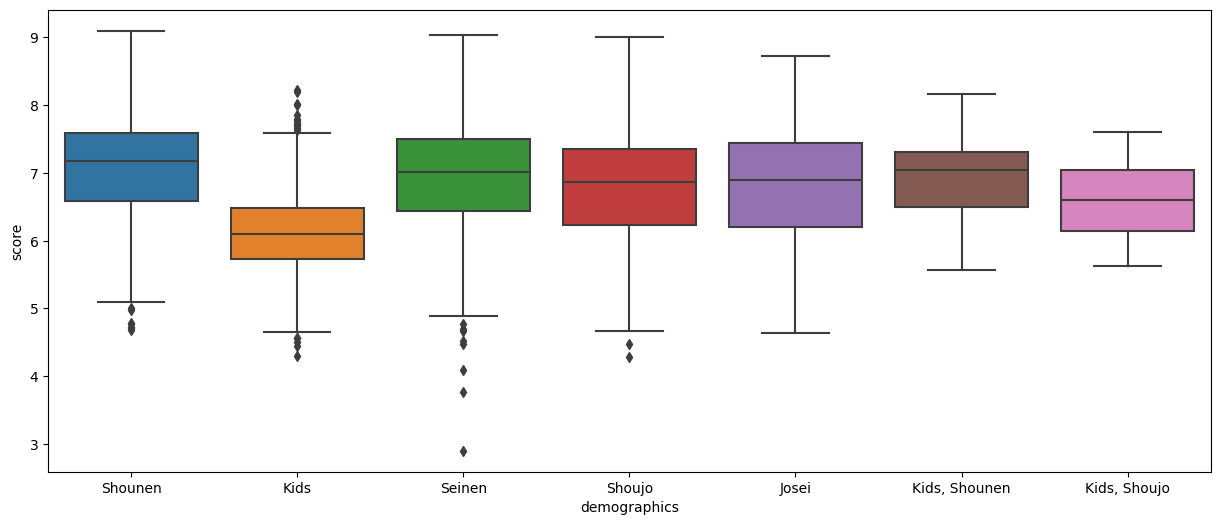

In [33]:
plt.figure(figsize=(15, 6))
sns.boxplot(y = 'score', x = 'demographics',data= anime, order=anime['demographics'].value_counts().index)

The viewers score anime with a Shounen demographic higher than the others.

# Genre Feature

Since an anime can have more than one studio working on it, we must first seperate the studios to make sure we get an accurate count. For now, we also have to fill in of any missing values 

In [34]:
print(anime['genres'].isnull().sum())
anime['genres']= anime['genres'].fillna('')

709


In [90]:
anime['genres'][1]

'Action, Adventure, Fantasy'

In [86]:
# function to iterate through the column and craete a list and from the list get the values
def to_1d(series):
    return pd.Series([x for list in series for x in list])

In [87]:
anime['Genre_split']= anime['genres'].apply(lambda x : x.replace(' ', ''))
anime['Genre_split']= anime['Genre_split'].apply(lambda x : x.split(','))
gs_top = to_1d(anime['Genre_split']).value_counts().head(10).index
ngs_top = to_1d(anime['Genre_split']).value_counts().head(10)
ngs_top

Comedy          5130
Action          3973
Fantasy         3303
Adventure       2696
Sci-Fi          2425
Drama           2169
Romance         1805
Hentai          1471
Supernatural    1248
SliceofLife     1133
Name: count, dtype: int64

In [95]:
anime['Genre_split']

0        [Action, Adventure, Drama, Fantasy]
1               [Action, Adventure, Fantasy]
2                            [Action, Drama]
3                  [Drama, Sci-Fi, Suspense]
4                      [AwardWinning, Drama]
                        ...                 
14459                          [SliceofLife]
14460                               [Comedy]
14461                           [AvantGarde]
14462                               [Comedy]
14463                          [SliceofLife]
Name: Genre_split, Length: 14464, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Sci-Fi'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Romance'),
  Text(7, 0, 'Hentai'),
  Text(8, 0, 'Supernatural'),
  Text(9, 0, 'SliceofLife')])

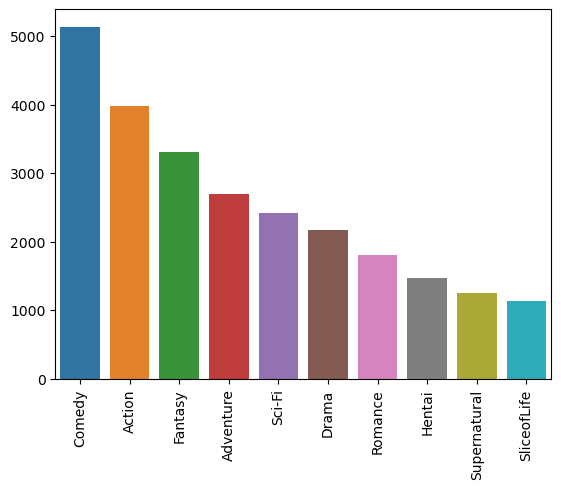

In [37]:
sns.barplot(x = ngs_top.index, y = ngs_top.values)
plt.xticks(rotation = 90)

These are the top ten most common genres in anime, the number 1 genre being Comedy

#### Now we need to get the scores, we need to do this by creating a function that will allow us to extract data from a target column

In [38]:
def get_data(col_index_name, col_target_name):
    data = []
    count = 0
    index_column = anime.columns.get_loc(col_target_name)
    for list_gen in anime[col_index_name]:
        for gen in list_gen:
            val = anime.iloc[count, index_column]
            data.append(val)
        count +=1
    return pd.Series(data)

In [39]:
score_get = get_data('Genre_split', 'score')

In [40]:
anime_aux2 = pd.DataFrame()
anime_aux2['genres'] = to_1d(anime['Genre_split'])
anime_aux2['score']= score_get
anime_aux2.head()
# use median since it acts as a more accurate depiction of the distribution
genre_median_10 = anime_aux2.groupby(['genres'], as_index=False).agg({'score' : 'median'}).sort_values('score', ascending=False).head(10)
genre_median_10

,genres,score
4,AwardWinning,7.525
21,Suspense,7.180
15,Mystery,7.115
7,Drama,6.900
16,Romance,6.870
20,Supernatural,6.820
12,Gourmet,6.800
19,Sports,6.755
1,Action,6.740
11,GirlsLove,6.710


<Axes: xlabel='genres', ylabel='score'>

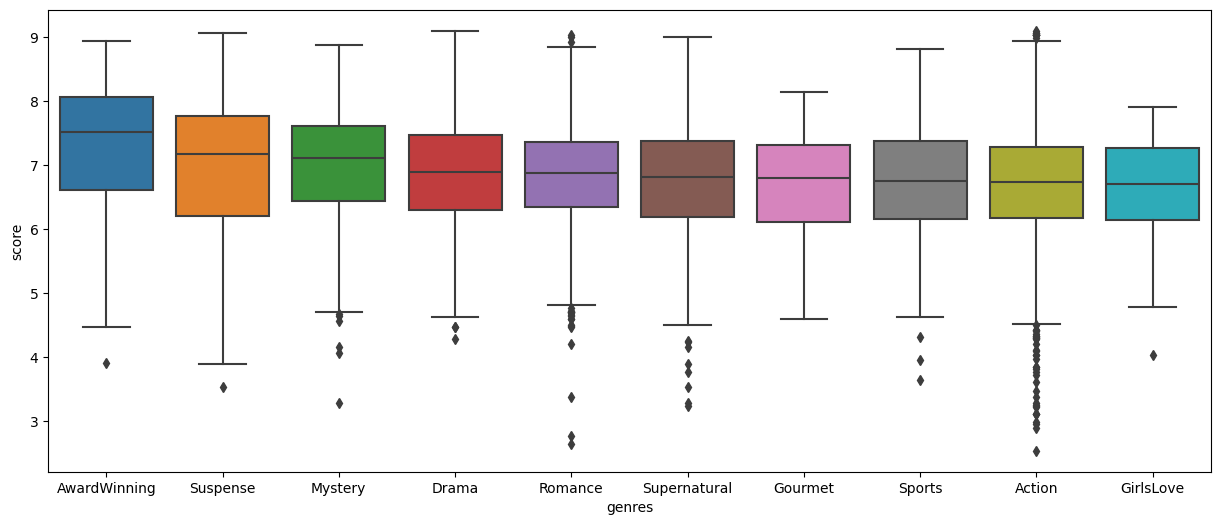

In [41]:
#get a visual
# filter the anime_aux2 df, to only get the teop ten genres with the highest score
fil = anime_aux2[anime_aux2['genres'].isin(genre_median_10['genres'])]
plt.figure(figsize=(15,6))
sns.boxplot(x = 'genres', y ='score', data = fil, order= genre_median_10['genres'])

These are the top ten genres according to score. The "Award Winning" genre being the most popular, not shocking considering they are Award Winning. 
#### How many animes have these genres?

In [42]:
fil['genres'].value_counts()


genres
Action          3973
Drama           2169
Romance         1805
Supernatural    1248
Mystery          760
Sports           566
AwardWinning     214
Suspense         195
Gourmet          108
GirlsLove        103
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Romance'),
  Text(3, 0, 'Supernatural'),
  Text(4, 0, 'Mystery'),
  Text(5, 0, 'Sports'),
  Text(6, 0, 'AwardWinning'),
  Text(7, 0, 'Suspense'),
  Text(8, 0, 'Gourmet'),
  Text(9, 0, 'GirlsLove')])

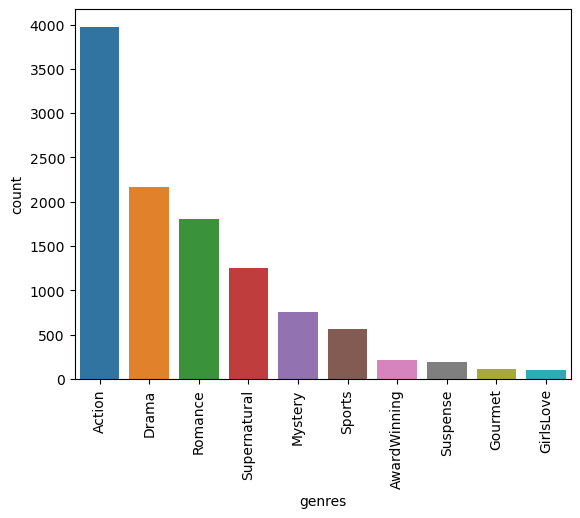

In [43]:
# get a visual for genre count
genre_vis = fil['genres'].value_counts().index
genre_vis_count = fil['genres'].value_counts()
sns.barplot(x = genre_vis, y =genre_vis_count)
plt.xticks(rotation = 90)

### What are the scores for most common genres scores

In [44]:
#filter to get the top most common genres with their score
filgenres_top10 = anime_aux2[anime_aux2['genres'].isin(gs_top)]
filgenres_top10

,genres,score
0,Action,9.10
1,Adventure,9.10
2,Drama,9.10
3,Fantasy,9.10
4,Action,9.04
...,...,...
29799,Action,5.20
29800,SliceofLife,5.01
29801,Comedy,4.84
29803,Comedy,5.08


In [45]:
genre_medianScore_top10 = filgenres_top10.groupby(['genres'], as_index=False).agg({'score' : 'median'}).sort_values('score', ascending=False).head(10)
genre_medianScore_top10

,genres,score
3,Drama,6.90
6,Romance,6.87
9,Supernatural,6.82
0,Action,6.74
1,Adventure,6.69
4,Fantasy,6.64
7,Sci-Fi,6.59
2,Comedy,6.58
8,SliceofLife,6.46
5,Hentai,6.17


<Axes: xlabel='genres', ylabel='score'>

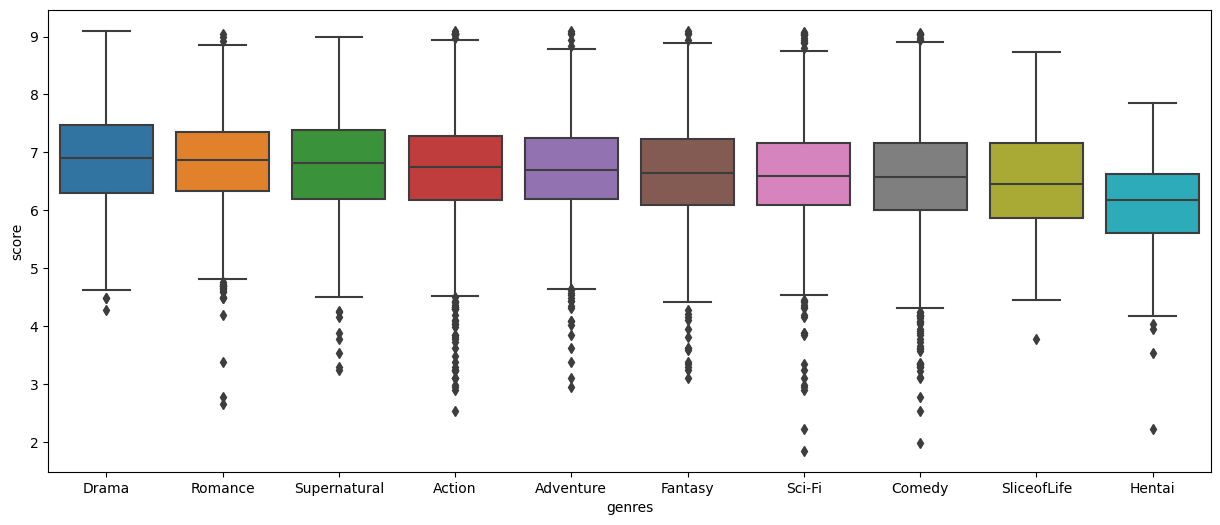

In [46]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'genres', y ='score', data = filgenres_top10, order= genre_medianScore_top10['genres'])

# Studio feature

In [47]:
anime['studios'] = anime['studios'].fillna('Unknown')
anime['Studio_split']= anime['studios'].apply(lambda x : x.replace(' ', ''))
anime['Studio_split']= anime['Studio_split'].apply(lambda x : x.split(','))
studio_top = to_1d(anime['Studio_split']).value_counts()[1:11].index
nstudio_top = to_1d(anime['Studio_split']).value_counts()[1:11]
nstudio_top

ToeiAnimation       723
Sunrise             508
J.C.Staff           390
Madhouse            354
ProductionI.G       319
TMSEntertainment    294
StudioDeen          287
Pierrot             259
OLM                 256
A-1Pictures         225
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ToeiAnimation'),
  Text(1, 0, 'Sunrise'),
  Text(2, 0, 'J.C.Staff'),
  Text(3, 0, 'Madhouse'),
  Text(4, 0, 'ProductionI.G'),
  Text(5, 0, 'TMSEntertainment'),
  Text(6, 0, 'StudioDeen'),
  Text(7, 0, 'Pierrot'),
  Text(8, 0, 'OLM'),
  Text(9, 0, 'A-1Pictures')])

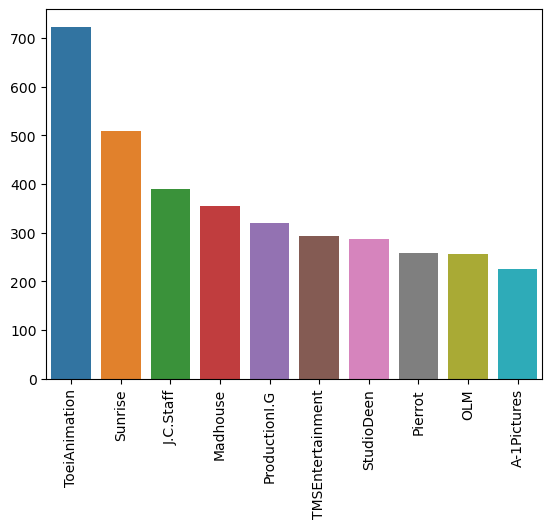

In [48]:
# visual
sns.barplot(x = nstudio_top.index, y = nstudio_top.values)
plt.xticks(rotation = 90)

In [49]:
studio_score_get = get_data('Studio_split', 'score')
anime_aux3 = pd.DataFrame()
anime_aux3['studio'] = to_1d(anime['Studio_split'])
anime_aux3['score']= studio_score_get


#### Get scores for the top common studios

In [50]:
fil3 = anime_aux3[anime_aux3['studio'].isin(studio_top)]
studio_median_top = fil3.groupby(['studio'], as_index=False).agg({'score' : 'median'}).sort_values('score',ascending=False)
studio_median_top

,studio,score
0,A-1Pictures,7.180
5,ProductionI.G,7.160
6,StudioDeen,7.050
8,TMSEntertainment,7.020
2,Madhouse,6.950
1,J.C.Staff,6.910
7,Sunrise,6.880
4,Pierrot,6.850
9,ToeiAnimation,6.640
3,OLM,6.575


The studio with the highest scored anime is A-1 Pictures with a median score of, 7.18

<Axes: xlabel='studio', ylabel='score'>

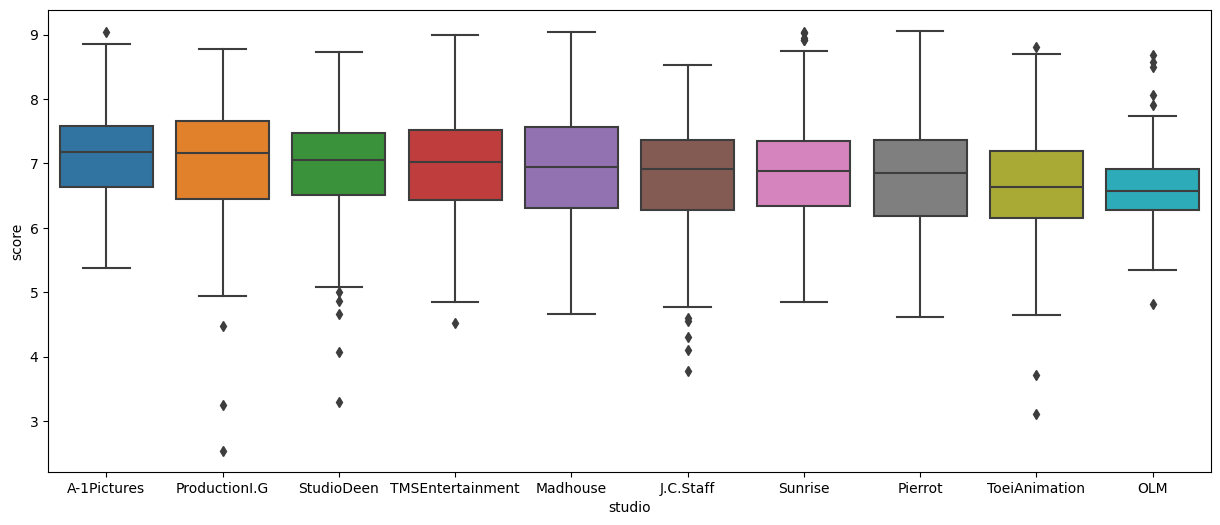

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'studio', y = 'score', data= fil3, order =studio_median_top['studio'] )

### Now Let's Look at the top scored studios

In [52]:
studio_scored= anime_aux3.groupby(['studio'], as_index = False).agg({'score' : 'median'}).sort_values('score', ascending= False).head(10)
studio_scored

,studio,score
467,NipponRamayanaFilmCo.,8.330
207,EggFirm,8.305
91,BUGFILMS,8.290
729,StudioSignpost,8.145
340,K-Factory,8.120
611,SharefunStudio,8.025
658,StudioBind,7.880
18,AHAEntertainment,7.875
624,Shuka,7.830
613,ShenmanEntertainment,7.810


In [53]:
fil2 = anime_aux3[anime_aux3['studio'].isin(studio_scored['studio'])]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NipponRamayanaFilmCo.'),
  Text(1, 0, 'EggFirm'),
  Text(2, 0, 'BUGFILMS'),
  Text(3, 0, 'StudioSignpost'),
  Text(4, 0, 'K-Factory'),
  Text(5, 0, 'SharefunStudio'),
  Text(6, 0, 'StudioBind'),
  Text(7, 0, 'AHAEntertainment'),
  Text(8, 0, 'Shuka'),
  Text(9, 0, 'ShenmanEntertainment')])

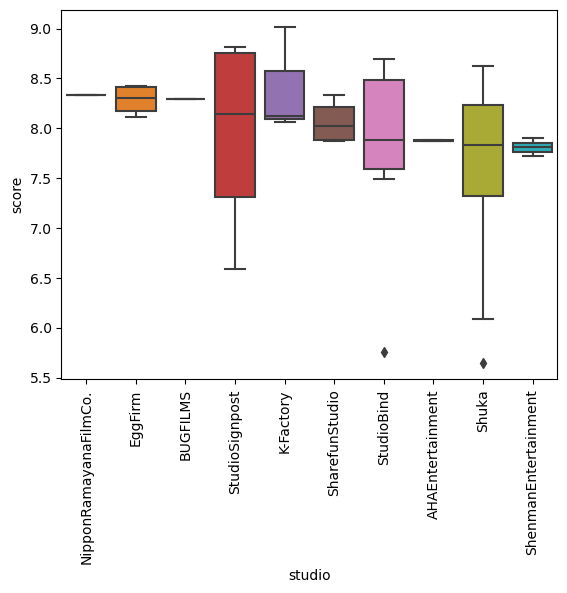

In [54]:
sns.boxplot(x = 'studio', y = 'score', data= fil2, order = studio_scored['studio'])
plt.xticks(rotation = 90)

From our visual we can see that the studios - Nippon Ramayana Film Co, BUGFILMS, and AHAEntertainment - have only one anime they have worked on.  which isn't very helpful. 
### check how many animes each studio has worked on

In [55]:
fil2['studio'].value_counts()

studio
Shuka                    19
StudioBind                7
EggFirm                   4
StudioSignpost            4
SharefunStudio            4
K-Factory                 3
AHAEntertainment          2
ShenmanEntertainment      2
BUGFILMS                  1
NipponRamayanaFilmCo.     1
Name: count, dtype: int64

My previous statement was slightly incorrect as AHAEntertainment has two animes

For the Studio features the top ten most common will be of more use

# Producers Feature

In [56]:
anime['producers'] = anime['producers'].fillna('Unknown')
anime['Producer_split']= anime['producers'].apply(lambda x : x.replace(' ', ''))
anime['Producer_split']= anime['Producer_split'].apply(lambda x : x.split(','))
pro_top = to_1d(anime['Producer_split']).value_counts()[1:11].index
npro = to_1d(anime['Producer_split']).value_counts()[1:11]
npro

Aniplex         555
TVTokyo         536
Lantis          450
Movic           409
BandaiVisual    405
AT-X            387
Dentsu          364
PonyCanyon      354
Kadokawa        322
FujiTV          317
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Aniplex'),
  Text(1, 0, 'TVTokyo'),
  Text(2, 0, 'Lantis'),
  Text(3, 0, 'Movic'),
  Text(4, 0, 'BandaiVisual'),
  Text(5, 0, 'AT-X'),
  Text(6, 0, 'Dentsu'),
  Text(7, 0, 'PonyCanyon'),
  Text(8, 0, 'Kadokawa'),
  Text(9, 0, 'FujiTV')])

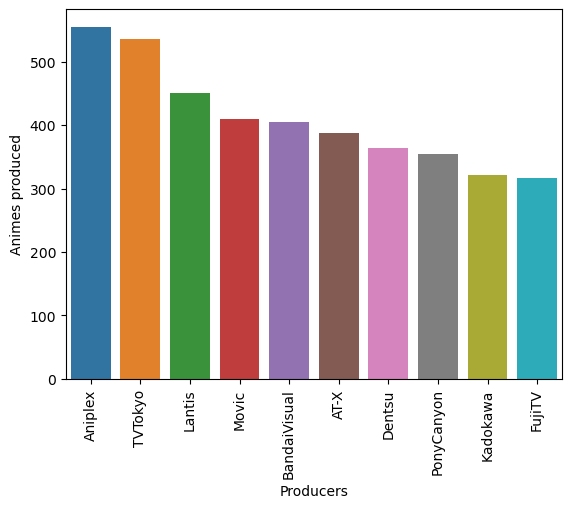

In [57]:
#visualization of top ten producers
sns.barplot(x = npro.index, y = npro.values)
plt.xlabel('Producers')
plt.ylabel('Animes produced')
plt.xticks(rotation = 90)

In [58]:
pro_score_get = get_data('Producer_split', 'score')
anime_aux4 = pd.DataFrame()
anime_aux4['producers'] = to_1d(anime['Producer_split'])
anime_aux4['score']= pro_score_get

##  top Producer with highest scores

In [59]:
pro10 = anime_aux4.groupby(['producers'], as_index=False).agg({'score' : 'median'}).sort_values('score', ascending=False).head(10)
pro10

,producers,score
761,MiracleRobo,8.940
103,Annapuru,8.710
1144,Sumzap,8.630
224,CDProjektRed,8.600
1407,voqueting,8.565
941,RexEntertainment,8.540
134,AudioHighs,8.510
386,FBC,8.470
429,Funimation,8.440
1056,SonyMusicSolutions,8.415


In [60]:
fil4 = anime_aux4[anime_aux4['producers'].isin(pro10['producers'])]
fil4['producers'].value_counts()

producers
SonyMusicSolutions    10
Sumzap                 3
MiracleRobo            3
voqueting              2
AudioHighs             2
CDProjektRed           1
RexEntertainment       1
FBC                    1
Funimation             1
Annapuru               1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MiracleRobo'),
  Text(1, 0, 'Annapuru'),
  Text(2, 0, 'Sumzap'),
  Text(3, 0, 'CDProjektRed'),
  Text(4, 0, 'voqueting'),
  Text(5, 0, 'RexEntertainment'),
  Text(6, 0, 'AudioHighs'),
  Text(7, 0, 'FBC'),
  Text(8, 0, 'Funimation'),
  Text(9, 0, 'SonyMusicSolutions')])

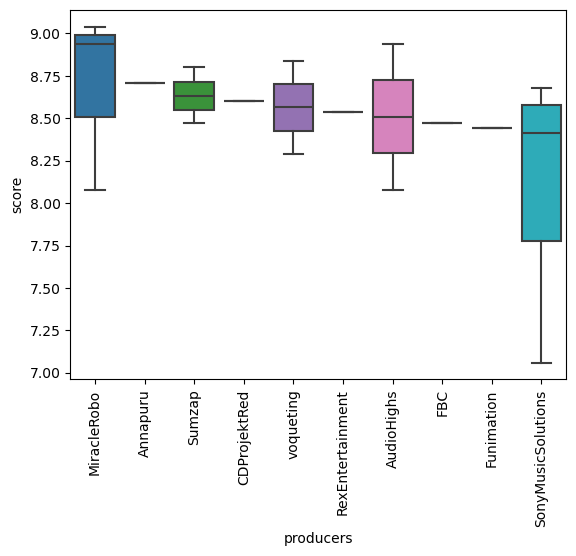

In [61]:
sns.boxplot(x = 'producers', y = 'score', data= fil4, order = pro10['producers'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SonyMusicSolutions'),
  Text(1, 0, 'Sumzap'),
  Text(2, 0, 'MiracleRobo'),
  Text(3, 0, 'voqueting'),
  Text(4, 0, 'AudioHighs'),
  Text(5, 0, 'CDProjektRed'),
  Text(6, 0, 'RexEntertainment'),
  Text(7, 0, 'FBC'),
  Text(8, 0, 'Funimation'),
  Text(9, 0, 'Annapuru')])

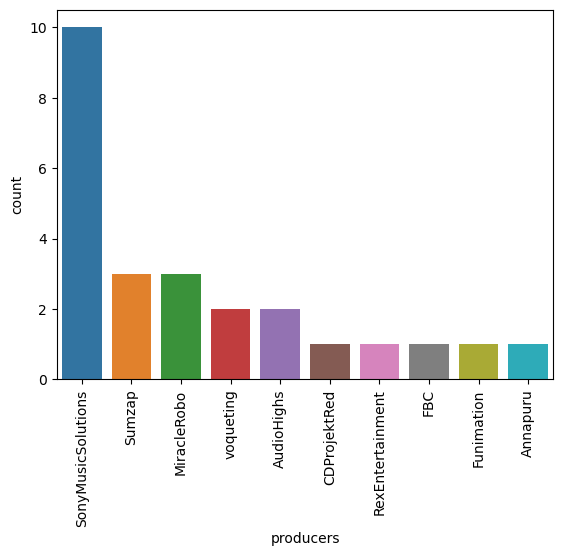

In [62]:
pro_vis = fil4['producers'].value_counts().index
pro_vis_count = fil4['producers'].value_counts()
sns.barplot(x = pro_vis, y = pro_vis_count)
plt.xticks(rotation = 90)

Half of the producers in the Top scored, only have 1 anime produced. The amount of anime per producer in the Top scored are very low, the hghest being only 10, therefore to get a better account the producer feature, we will be focusing on the top ten most common producers instead

In [63]:
fil_pro = anime_aux4[anime_aux4['producers'].isin(pro_top)]
pro_median_top = fil_pro.groupby(['producers'], as_index=False).agg({'score' : 'median'}).sort_values('score',ascending=False)
pro_median_top


,producers,score
3,Dentsu,7.43
1,Aniplex,7.38
7,Movic,7.21
4,FujiTV,7.20
5,Kadokawa,7.14
8,PonyCanyon,7.05
9,TVTokyo,7.05
0,AT-X,7.03
2,BandaiVisual,7.03
6,Lantis,7.01


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Dentsu'),
  Text(1, 0, 'Aniplex'),
  Text(2, 0, 'Movic'),
  Text(3, 0, 'FujiTV'),
  Text(4, 0, 'Kadokawa'),
  Text(5, 0, 'PonyCanyon'),
  Text(6, 0, 'TVTokyo'),
  Text(7, 0, 'AT-X'),
  Text(8, 0, 'BandaiVisual'),
  Text(9, 0, 'Lantis')])

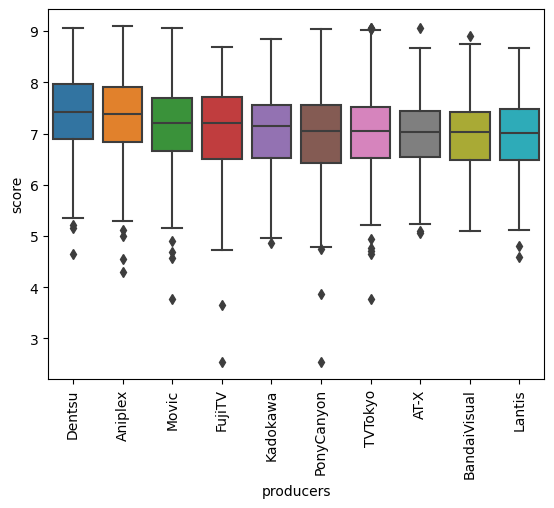

In [64]:
sns.boxplot(x = 'producers', y = 'score', data= fil_pro, order = pro_median_top['producers'])
plt.xticks(rotation = 90)

# Licensor Feature

In [65]:
anime['licensors'] = anime['licensors'].fillna('Unknown')
anime['License_split']= anime['licensors'].apply(lambda x : x.replace(' ', ''))
anime['License_split']= anime['License_split'].apply(lambda x : x.split(','))
li_top = to_1d(anime['License_split']).value_counts()[1:11].index
nlis = to_1d(anime['License_split']).value_counts()[1:11]
nlis

Funimation                1211
SentaiFilmworks            925
DiscotekMedia              501
ADVFilms                   304
MediaBlasters              288
AniplexofAmerica           240
BandaiEntertainment        201
VIZMedia                   199
GeneonEntertainmentUSA     181
CentralParkMedia           154
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Funimation'),
  Text(1, 0, 'SentaiFilmworks'),
  Text(2, 0, 'DiscotekMedia'),
  Text(3, 0, 'ADVFilms'),
  Text(4, 0, 'MediaBlasters'),
  Text(5, 0, 'AniplexofAmerica'),
  Text(6, 0, 'BandaiEntertainment'),
  Text(7, 0, 'VIZMedia'),
  Text(8, 0, 'GeneonEntertainmentUSA'),
  Text(9, 0, 'CentralParkMedia')])

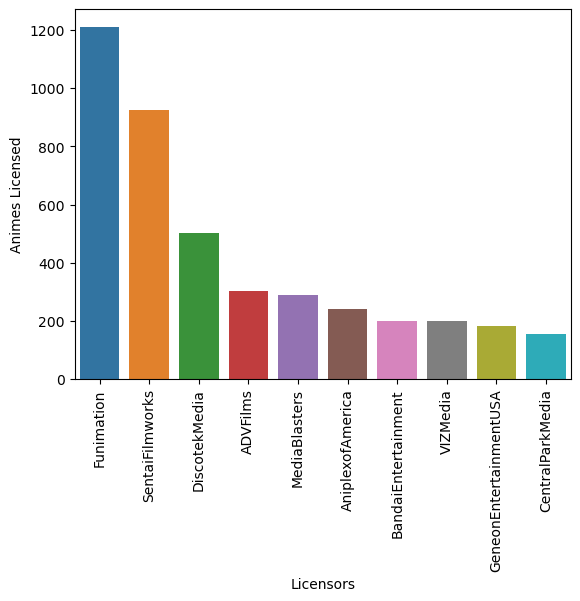

In [66]:
#visualization of top ten licensors
sns.barplot(x = nlis.index, y = nlis.values)
plt.xlabel('Licensors')
plt.ylabel('Animes Licensed')
plt.xticks(rotation = 90)

In [67]:
lis_score_get = get_data('License_split', 'score')
anime_aux5 = pd.DataFrame()
anime_aux5['licensors'] = to_1d(anime['License_split'])
anime_aux5['score']= pro_score_get

Top scored Licensors

In [68]:
lis10 = anime_aux5.groupby(['licensors'], as_index=False).agg({'score' : 'median'}).sort_values('score', ascending=False).head(10)
lis10

,licensors,score
63,PiedPiper,8.445
26,DisneyPlatformDistribution,8.275
19,CrimsonStarMedia,8.210
23,DiCEntertainment,8.190
27,DreamWorks,8.185
71,SonyPicturesEntertainment,8.180
41,Inc.,8.160
8,AniplexofAmerica,8.160
44,KadokawaPicturesUSA,8.110
57,NISAmerica,8.090


In [69]:
fil5 = anime_aux5[anime_aux5['licensors'].isin(lis10['licensors'])]
fil5['licensors'].value_counts()

licensors
AniplexofAmerica              240
NISAmerica                     55
Inc.                           55
DisneyPlatformDistribution     18
SonyPicturesEntertainment      11
KadokawaPicturesUSA             9
DiCEntertainment                3
PiedPiper                       2
DreamWorks                      2
CrimsonStarMedia                1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PiedPiper'),
  Text(1, 0, 'DisneyPlatformDistribution'),
  Text(2, 0, 'CrimsonStarMedia'),
  Text(3, 0, 'DiCEntertainment'),
  Text(4, 0, 'DreamWorks'),
  Text(5, 0, 'SonyPicturesEntertainment'),
  Text(6, 0, 'Inc.'),
  Text(7, 0, 'AniplexofAmerica'),
  Text(8, 0, 'KadokawaPicturesUSA'),
  Text(9, 0, 'NISAmerica')])

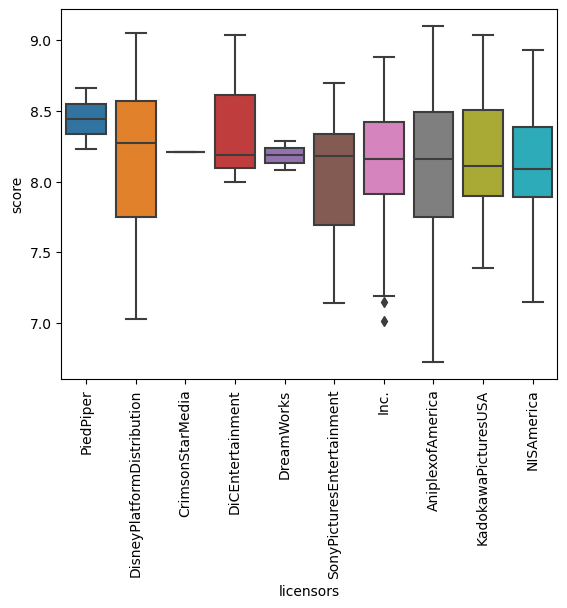

In [70]:
sns.boxplot(x = 'licensors', y = 'score', data= fil5, order = lis10['licensors'])
plt.xticks(rotation = 90)

Seeing how every licensor, except Aniplex, licensed less than 100 hundred, let's focus on the top ten common licensors instead.

In [71]:
fil_lis = anime_aux5[anime_aux5['licensors'].isin(li_top)]
lis_median_top = fil_lis.groupby(['licensors'], as_index=False).agg({'score' : 'median'}).sort_values('score',ascending=False)
lis_median_top

,licensors,score
1,AniplexofAmerica,8.16
9,VIZMedia,7.89
5,Funimation,7.83
8,SentaiFilmworks,7.69
2,BandaiEntertainment,7.62
6,GeneonEntertainmentUSA,7.60
4,DiscotekMedia,7.51
0,ADVFilms,7.44
7,MediaBlasters,7.27
3,CentralParkMedia,7.20


Lucky us!, Aniplex is still in the top ten!

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'AniplexofAmerica'),
  Text(1, 0, 'VIZMedia'),
  Text(2, 0, 'Funimation'),
  Text(3, 0, 'SentaiFilmworks'),
  Text(4, 0, 'BandaiEntertainment'),
  Text(5, 0, 'GeneonEntertainmentUSA'),
  Text(6, 0, 'DiscotekMedia'),
  Text(7, 0, 'ADVFilms'),
  Text(8, 0, 'MediaBlasters'),
  Text(9, 0, 'CentralParkMedia')])

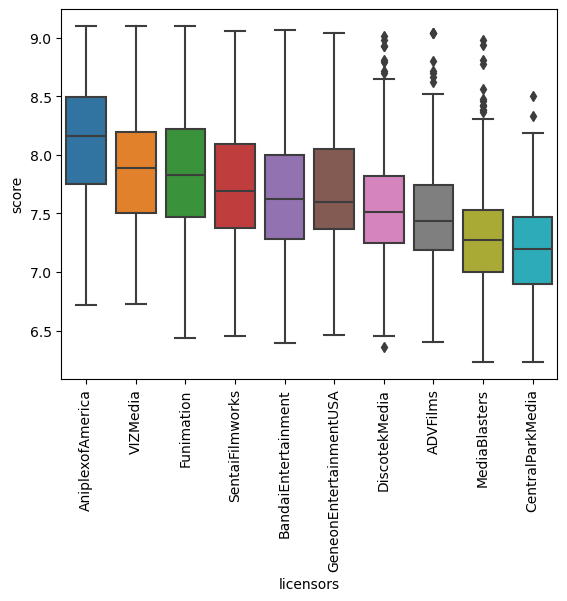

In [72]:
sns.boxplot(x = 'licensors', y = 'score', data= fil_lis, order = lis_median_top['licensors'])
plt.xticks(rotation = 90)

Aniplex is the Licensor that has the better scored anime, the median score being 8.16

# Theme Feature

In [73]:
anime['themes'] = anime['themes'].fillna('Unknown')
anime['Theme_split']= anime['themes'].apply(lambda x : x.replace(' ', ''))
anime['Theme_split']= anime['Theme_split'].apply(lambda x : x.split(','))
theme_top = to_1d(anime['Theme_split']).value_counts()[1:11].index
nthe = to_1d(anime['Theme_split']).value_counts()[1:11]
nthe

School         1687
Mecha          1048
Historical      936
Music           727
Military        584
Parody          547
SuperPower      534
Mythology       529
Space           453
MartialArts     446
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'School'),
  Text(1, 0, 'Mecha'),
  Text(2, 0, 'Historical'),
  Text(3, 0, 'Music'),
  Text(4, 0, 'Military'),
  Text(5, 0, 'Parody'),
  Text(6, 0, 'SuperPower'),
  Text(7, 0, 'Mythology'),
  Text(8, 0, 'Space'),
  Text(9, 0, 'MartialArts')])

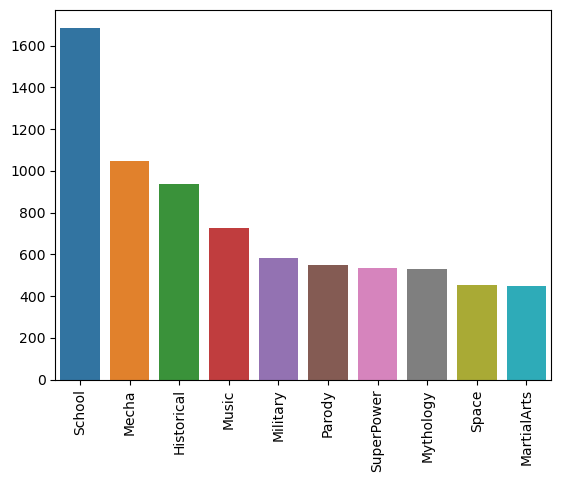

In [74]:
# visual count
sns.barplot(x = nthe.index, y = nthe.values)
plt.xticks(rotation =90)

In [75]:
theme_score_get = get_data('Theme_split', 'score')
anime_aux6 = pd.DataFrame()
anime_aux6['themes'] = to_1d(anime['Theme_split'])
anime_aux6['score']= theme_score_get

### Top Ten scored themes. Themes preferred

In [76]:
the10 = anime_aux6.groupby(['themes'], as_index=False).agg({'score' : 'median'}).sort_values('score', ascending=False).head(10)
the10

,themes,score
36,RomanticSubtext,7.565
17,Iyashikei,7.560
3,Childcare,7.560
18,LovePolygon,7.550
27,OrganizedCrime,7.475
9,GagHumor,7.380
0,AdultCast,7.365
2,CGDCT,7.280
34,Reincarnation,7.250
28,OtakuCulture,7.250


In [77]:
fil6 = anime_aux6[anime_aux6['themes'].isin(the10['themes'])]
fil6['themes'].value_counts()

themes
AdultCast          408
CGDCT              201
GagHumor           199
Iyashikei          171
Reincarnation       89
OtakuCulture        84
LovePolygon         76
OrganizedCrime      54
Childcare           51
RomanticSubtext     44
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'AdultCast'),
  Text(1, 0, 'CGDCT'),
  Text(2, 0, 'GagHumor'),
  Text(3, 0, 'Iyashikei'),
  Text(4, 0, 'Reincarnation'),
  Text(5, 0, 'OtakuCulture'),
  Text(6, 0, 'LovePolygon'),
  Text(7, 0, 'OrganizedCrime'),
  Text(8, 0, 'Childcare'),
  Text(9, 0, 'RomanticSubtext')])

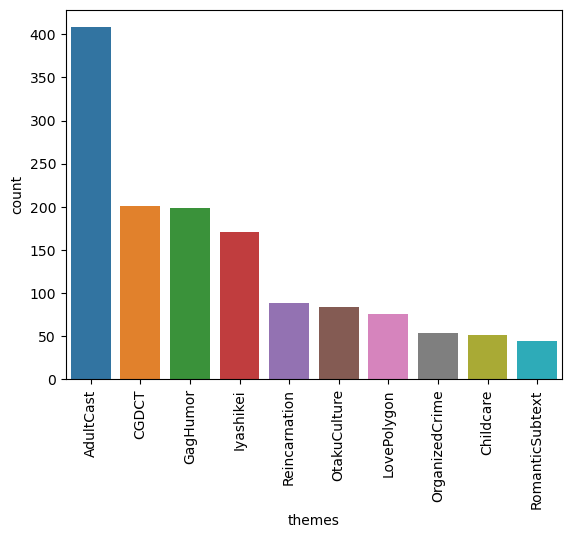

In [78]:
the1 = fil6['themes'].value_counts().index
the2=fil6['themes'].value_counts()
sns.barplot(x = the1, y =the2)
plt.xticks(rotation = 90)

Not too bad, we will look at this data, as well as the top ten most common

<Axes: xlabel='themes', ylabel='score'>

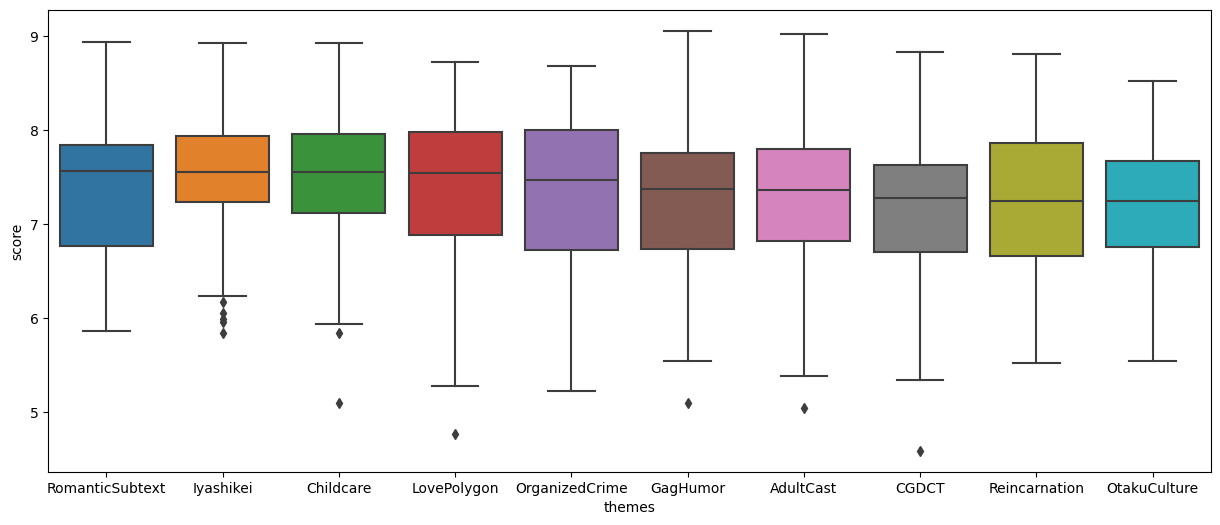

In [79]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'themes', y ='score', data = fil6, order= the10['themes'])

Romantic subtext, Iyashikei, and childcare are the highest scored theme, However it should be noted that childcare and romantic subtext are themes to less than 100 anime, this does skew how the score is. 

Finally we will look at top ten common

In [80]:
fil_the = anime_aux6[anime_aux6['themes'].isin(theme_top)]
the_median_top = fil_the.groupby(['themes'], as_index=False).agg({'score' : 'median'}).sort_values('score',ascending=False)
the_median_top

,themes,score
7,School,6.910
3,Military,6.880
5,Mythology,6.780
9,SuperPower,6.775
0,Historical,6.740
1,MartialArts,6.715
8,Space,6.680
2,Mecha,6.545
4,Music,6.290
6,Parody,6.250


<Axes: xlabel='themes', ylabel='score'>

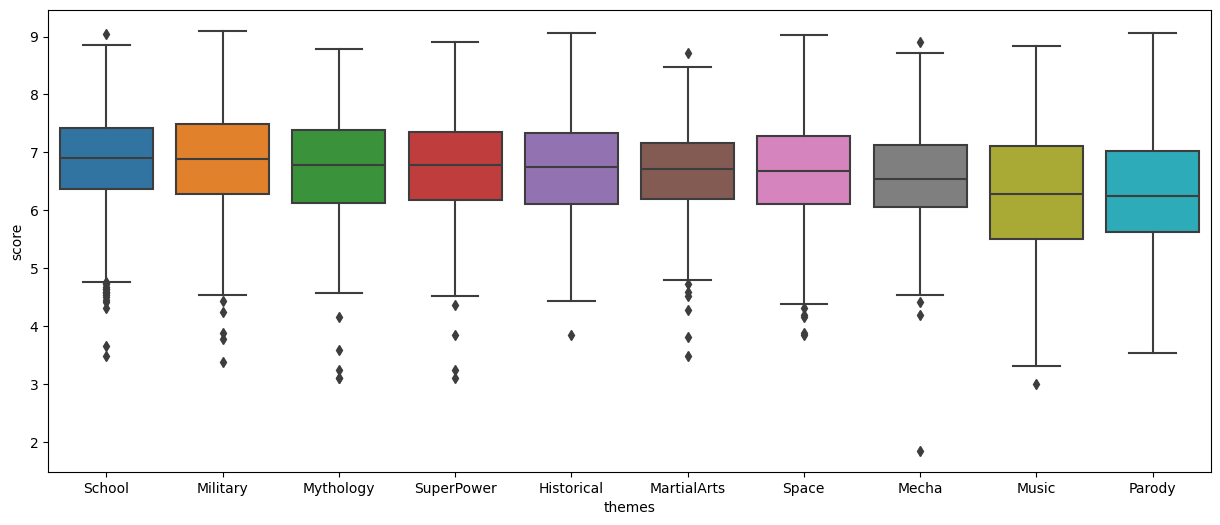

In [81]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'themes', y ='score', data = fil_the, order= the_median_top['themes'])

The school theme is the common theme with the highest score of 6.910, This theme is seen in 1687 anime